In [1]:
import json
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
path = "/opt/data/team/hien/data/raw"
#read edited json
with open(path + "/BPlan_Berlin_Planzeichen_filtered_updated.json","r")as file:
    obj = json.load(file)
    img = obj["images"]
    anno = obj["annotations"]

    
directory = path + "/files/resized_dataset"
os.chdir(directory)

In [3]:
hist_width = []
for ans in anno:
    hist_width.append(int(ans["bbox"][2]))
    


[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 11, 11, 11, 12, 10, 9, 11, 11, 12, 17, 17, 17, 16, 17, 16, 18, 20, 15, 15, 16, 19, 17, 18, 18, 17, 15, 17, 16, 19, 16, 16, 15, 14, 17, 18, 19, 16, 18, 17, 15, 20, 19, 17, 18, 15, 17, 16, 15, 19, 16, 17, 17, 15, 20, 20, 17, 14, 17, 18, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 13, 10, 11, 9, 12, 9, 11, 8, 11, 12, 26, 10, 12, 11, 9, 12, 10, 13, 11, 11, 12, 13, 11, 12, 13,

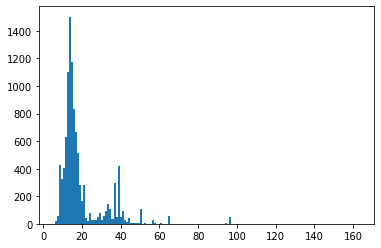

{163: 1, 121: 1, 93: 1, 98: 1, 105: 1, 113: 1, 112: 1, 101: 1, 110: 1, 68: 1, 67: 1, 60: 1, 89: 1, 54: 1, 6: 1, 117: 1, 107: 2, 102: 2, 96: 2, 99: 2, 64: 2, 59: 2, 63: 2, 94: 3, 49: 3, 58: 3, 61: 3, 53: 4, 46: 4, 47: 5, 48: 7, 45: 8, 43: 13, 50: 17, 7: 20, 29: 21, 23: 23, 27: 25, 57: 25, 42: 26, 28: 26, 26: 28, 25: 28, 31: 29, 36: 36, 44: 41, 22: 41, 38: 48, 40: 51, 97: 52, 32: 55, 8: 56, 65: 60, 24: 75, 30: 78, 51: 87, 41: 90, 33: 96, 35: 105, 34: 145, 20: 169, 19: 282, 21: 285, 37: 293, 10: 325, 11: 406, 39: 422, 9: 428, 18: 512, 12: 627, 17: 669, 16: 830, 13: 1100, 15: 1172, 14: 1503}


In [4]:
print(hist_width)
plt.hist(hist_width, bins =150)
plt.show()

my_dict = {i:hist_width.count(i) for i in hist_width}


sorted_dict = {}
sorted_keys = sorted(my_dict, key=my_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = my_dict[w]
    
print(sorted_dict)

In [5]:
sum_width = 0
for w in range(len(hist_width)):
    sum_width += hist_width[w]
average_width = sum_width/ len(hist_width)
print(average_width)

for im in img:
    file_name = im["file_name"]
    for an in anno:
        sum_width_img = 0
        len_anno = 0
        if(an['image_id'] == im["id"]):
            sum_width_img += an['bbox'][2]
            len_anno += 1
        if len_anno != 0:
            average_width_img = sum_width_img / len_anno
            #scaling factor
            scaling_fact = average_width / average_width_img
    for an2 in anno:
        if(an2['image_id'] == im["id"]):
            #scale all bbox &segmentation values by scaling factor
            an2['bbox'] = [b * scaling_fact for b in an2['bbox']]
            #an2['segmentation'] = [s * scaling_fact for s in an2['segmentation']]
    im['width'] = im['width'] * scaling_fact
    im['height'] = im['height'] * scaling_fact
    image = cv2.imread(path + '/files/BPlan_cropped/' + file_name)
    scaled_img = cv2.resize(image, None, fx = scaling_fact, fy = scaling_fact, interpolation = cv2.INTER_LINEAR)
    cv2.imwrite(file_name, scaled_img)
    
    
    
    
with open(path + '/BPlan_Berlin_Planzeichen_resized_new.json', 'w') as output:
    json.dump(obj, output, indent=4)

19.51067683508103


In [6]:
print('done')

done


[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 17, 17, 17, 19, 16, 14, 17, 17, 19, 18, 18, 18, 17, 18, 17, 19, 21, 16, 16, 17, 20, 18, 19, 19, 18, 16, 18, 17, 20, 17, 17, 16, 15, 18, 19, 20, 17, 19, 18, 16, 21, 20, 18, 19, 16, 18, 17, 16, 20, 17, 18, 18, 16, 21, 21, 18, 15, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

{46: 1, 43: 1, 38: 1, 48: 2, 10: 2, 35: 2, 40: 3, 41: 3, 37: 3, 9: 3, 36: 4, 33: 4, 32: 5, 34: 6, 11: 8, 39: 11, 31: 20, 29: 24, 28: 25, 12: 43, 13: 93, 30: 110, 25: 113, 27: 113, 26: 163, 14: 297, 23: 380, 24: 452, 15: 537, 22: 570, 16: 779, 17: 922, 21: 955, 20: 996, 18: 1278, 19: 2561}


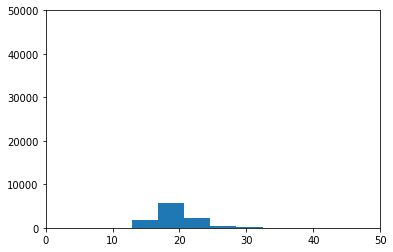

In [7]:
hist_w = []
for a in anno:
    hist_w.append(int(a["bbox"][2]))
plt.hist(hist_w)
print(hist_w)

my_dict = {i:hist_w.count(i) for i in hist_w}


sorted_dict = {}
sorted_keys = sorted(my_dict, key=my_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = my_dict[w]
    
print(sorted_dict)
limits = [ 0, 50, 0, 50000]

plt.axis(limits)
plt.show()

In [8]:
for ann in anno:
    if ann["bbox"][2] > 50:
        print(ann['image_id'])
        print(ann['id'])